In [1]:
import matplotlib.pyplot as plt
import numpy as np
from functions.CreateYarnGeneral import CreateYarn

In [2]:
!rm -r output/
!mkdir output/
!mkdir output/mesh
!mkdir output/ccx

In [3]:
# cualquier curva periodica puede ser describida por una serie de fourier

r = 5

trajs =[]  
# =============================================================================

nq = 4
fc1 = lambda x: (r**nq - x**nq)**(1/nq)

x12 = np.linspace(0,r,2000)
y12 = fc1(x12)

trajs.append( np.array([x12,y12, np.zeros_like(x12)]).T )

# =============================================================================

nq = 2
fc1 = lambda x: -(r**nq - (x-2*r)**nq)**(1/nq) + 2*r

x12 = np.linspace(r,2*r,2000)
y12 = fc1(x12)

trajs.append( np.array([x12,y12, np.zeros_like(x12)]).T )

# =============================================================================




In [4]:
trajs

[array([[0.00000000e+00, 5.00000000e+00, 0.00000000e+00],
        [2.50125063e-03, 5.00000000e+00, 0.00000000e+00],
        [5.00250125e-03, 5.00000000e+00, 0.00000000e+00],
        ...,
        [4.99499750e+00, 1.25711887e+00, 0.00000000e+00],
        [4.99749875e+00, 1.05730511e+00, 0.00000000e+00],
        [5.00000000e+00, 0.00000000e+00, 0.00000000e+00]]),
 array([[ 5.        , 10.        ,  0.        ],
        [ 5.00250125,  9.84186635,  0.        ],
        [ 5.0050025 ,  9.77639323,  0.        ],
        ...,
        [ 9.9949975 ,  5.0000025 ,  0.        ],
        [ 9.99749875,  5.00000063,  0.        ],
        [10.        ,  5.        ,  0.        ]])]

(np.float64(-0.5), np.float64(10.5), np.float64(-0.5), np.float64(10.5))

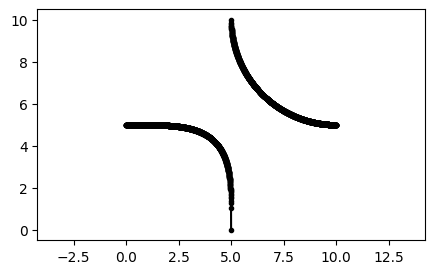

In [5]:

fig = plt.figure()
fig.set_size_inches(5, 3)
# compute fourier coefficients
for itraj in trajs:

    plt.plot(itraj[:,0], itraj[:,1], 'k.-')

plt.axis('equal')

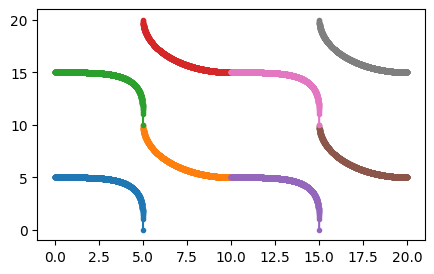

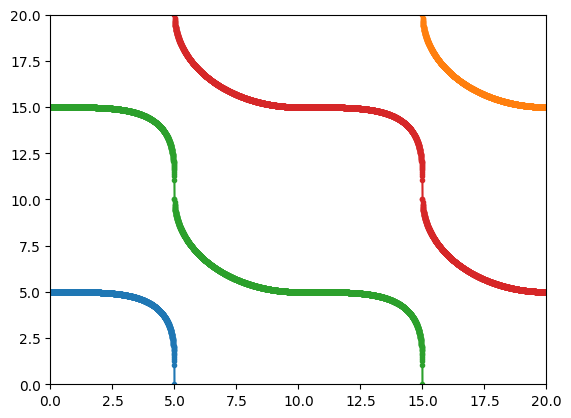

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Datos iniciales
Nx = 2
Ny = 2
all_points = np.concatenate(trajs)
Lx = np.max(all_points[:, 0]) - np.min(all_points[:, 0])
Ly = np.max(all_points[:, 1]) - np.min(all_points[:, 1])
x0 = np.min(all_points[:, 0])
y0 = np.min(all_points[:, 1])

# Función que determina si dos trayectorias están conectadas
def is_connected(traj1, traj2, threshold):
    return np.linalg.norm(traj1[-1] - traj2[0]) < threshold

def is_connected_2(traj1, traj2, threshold):
    return np.linalg.norm(traj1[0] - traj2[0]) < threshold

# Réplica de trayectorias
all_trajs = []
for ix in range(Nx):
    for iy in range(Ny):
        for itraj in trajs:
            new_traj = np.copy(itraj)
            new_traj[:, 0] += ix * Lx
            new_traj[:, 1] += iy * Ly
            all_trajs.append(new_traj)

# Visualización
fig = plt.figure()
fig.set_size_inches(5, 3)
for itraj in all_trajs:
    plt.plot(itraj[:, 0], itraj[:, 1], '.-')
plt.show()

# Agrupación de trayectorias conectadas
threshold = 5  # Ajusta según tus datos
final_trajs = []

while all_trajs:
    current_traj = all_trajs.pop(0)  # Toma la primera trayectoria
    combined = False

    for i, other_traj in enumerate(all_trajs):
        if is_connected(current_traj, other_traj, threshold):
            current_traj = np.vstack([current_traj, other_traj])  # Conecta las trayectorias
   
            all_trajs.pop(i)  # Elimina la trayectoria conectada
            
            # añade la trayectoria combinada al final de la lista
            all_trajs.append(current_traj)
            
            combined = True
            break  # Reinicia el proceso para seguir uniendo trayectorias

        if is_connected(other_traj,current_traj, threshold):
            current_traj = np.vstack([other_traj, current_traj])
            all_trajs.pop(i)

            all_trajs.append(current_traj)
            combined = True
            break

    if not combined:
        final_trajs.append(current_traj)  # Si no se conecta, es una trayectoria completa

# Visualización
fig = plt.figure()
for itraj in final_trajs:
    plt.plot(itraj[:, 0], itraj[:, 1], '.-')
plt.xlim([0, Nx * Lx])
plt.ylim([0, Ny * Ly])

trajs = final_trajs.copy()

In [ ]:
radius = 1

for i,itraj in enumerate(trajs):

    file = "output/mesh/yarn_" + str(i) + ".brep"

    CreateYarn({"trajs": itraj, 
                "radius": radius, 
                "density": 1,
                "file": file})

In [ ]:
from CompositeSandwich.CreateCompositeSandwich import CreateCompositeSandwich

In [ ]:
import glob

files = glob.glob("output/mesh/*.brep")
files = sorted(files)
files

['output/mesh/yarn_0.brep',
 'output/mesh/yarn_1.brep',
 'output/mesh/yarn_2.brep',
 'output/mesh/yarn_3.brep']

In [ ]:
params_mesh = {
    "files": files,
    "inp_file": "output/mesh/sandwich.inp",
    "trajs": trajs,
    "radius": radius,
    "r": r
}

CreateCompositeSandwich(params_mesh);

In [ ]:
all_points = np.concatenate(trajs)